In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypalettes import load_cmap

pd.set_option('future.no_silent_downcasting', True)

file_path = "SIPRI-Milex-data-1948-2023.xlsx"
sheet_name = "Current US$"
df = pd.read_excel(file_path, sheet_name=sheet_name)
df = df.replace(['...', 'xxx'], 0)

continents = ['Africa', 'Americas', 'Asia & Oceania', 'Europe', 'Middle East']
continent_indices = df[df['Country'].isin(continents)].index

data = {}
for start, end in zip(continent_indices, continent_indices[1:].append(pd.Index([len(df)]))):
    continent = df.loc[start, 'Country']
    data[continent] = df.iloc[start:end, 1:].sum().values

data['year'] = df.columns[1:]

df = pd.DataFrame(data).astype(float)
df.head()

,Africa,Americas,Asia & Oceania,Europe,Middle East,year
0,11364.660214,326706.782479,93903.830274,195258.873613,70182.022260,1991.0
1,10037.288206,351487.962308,102215.555387,201717.226408,63186.414831,1992.0
2,11188.598737,346219.587679,111322.244767,185816.074474,42758.349226,1993.0
3,9539.316349,341775.079338,118601.840830,196195.906881,40898.302470,1994.0
4,9244.260931,333656.755813,132718.907880,208859.526219,40522.276120,1995.0


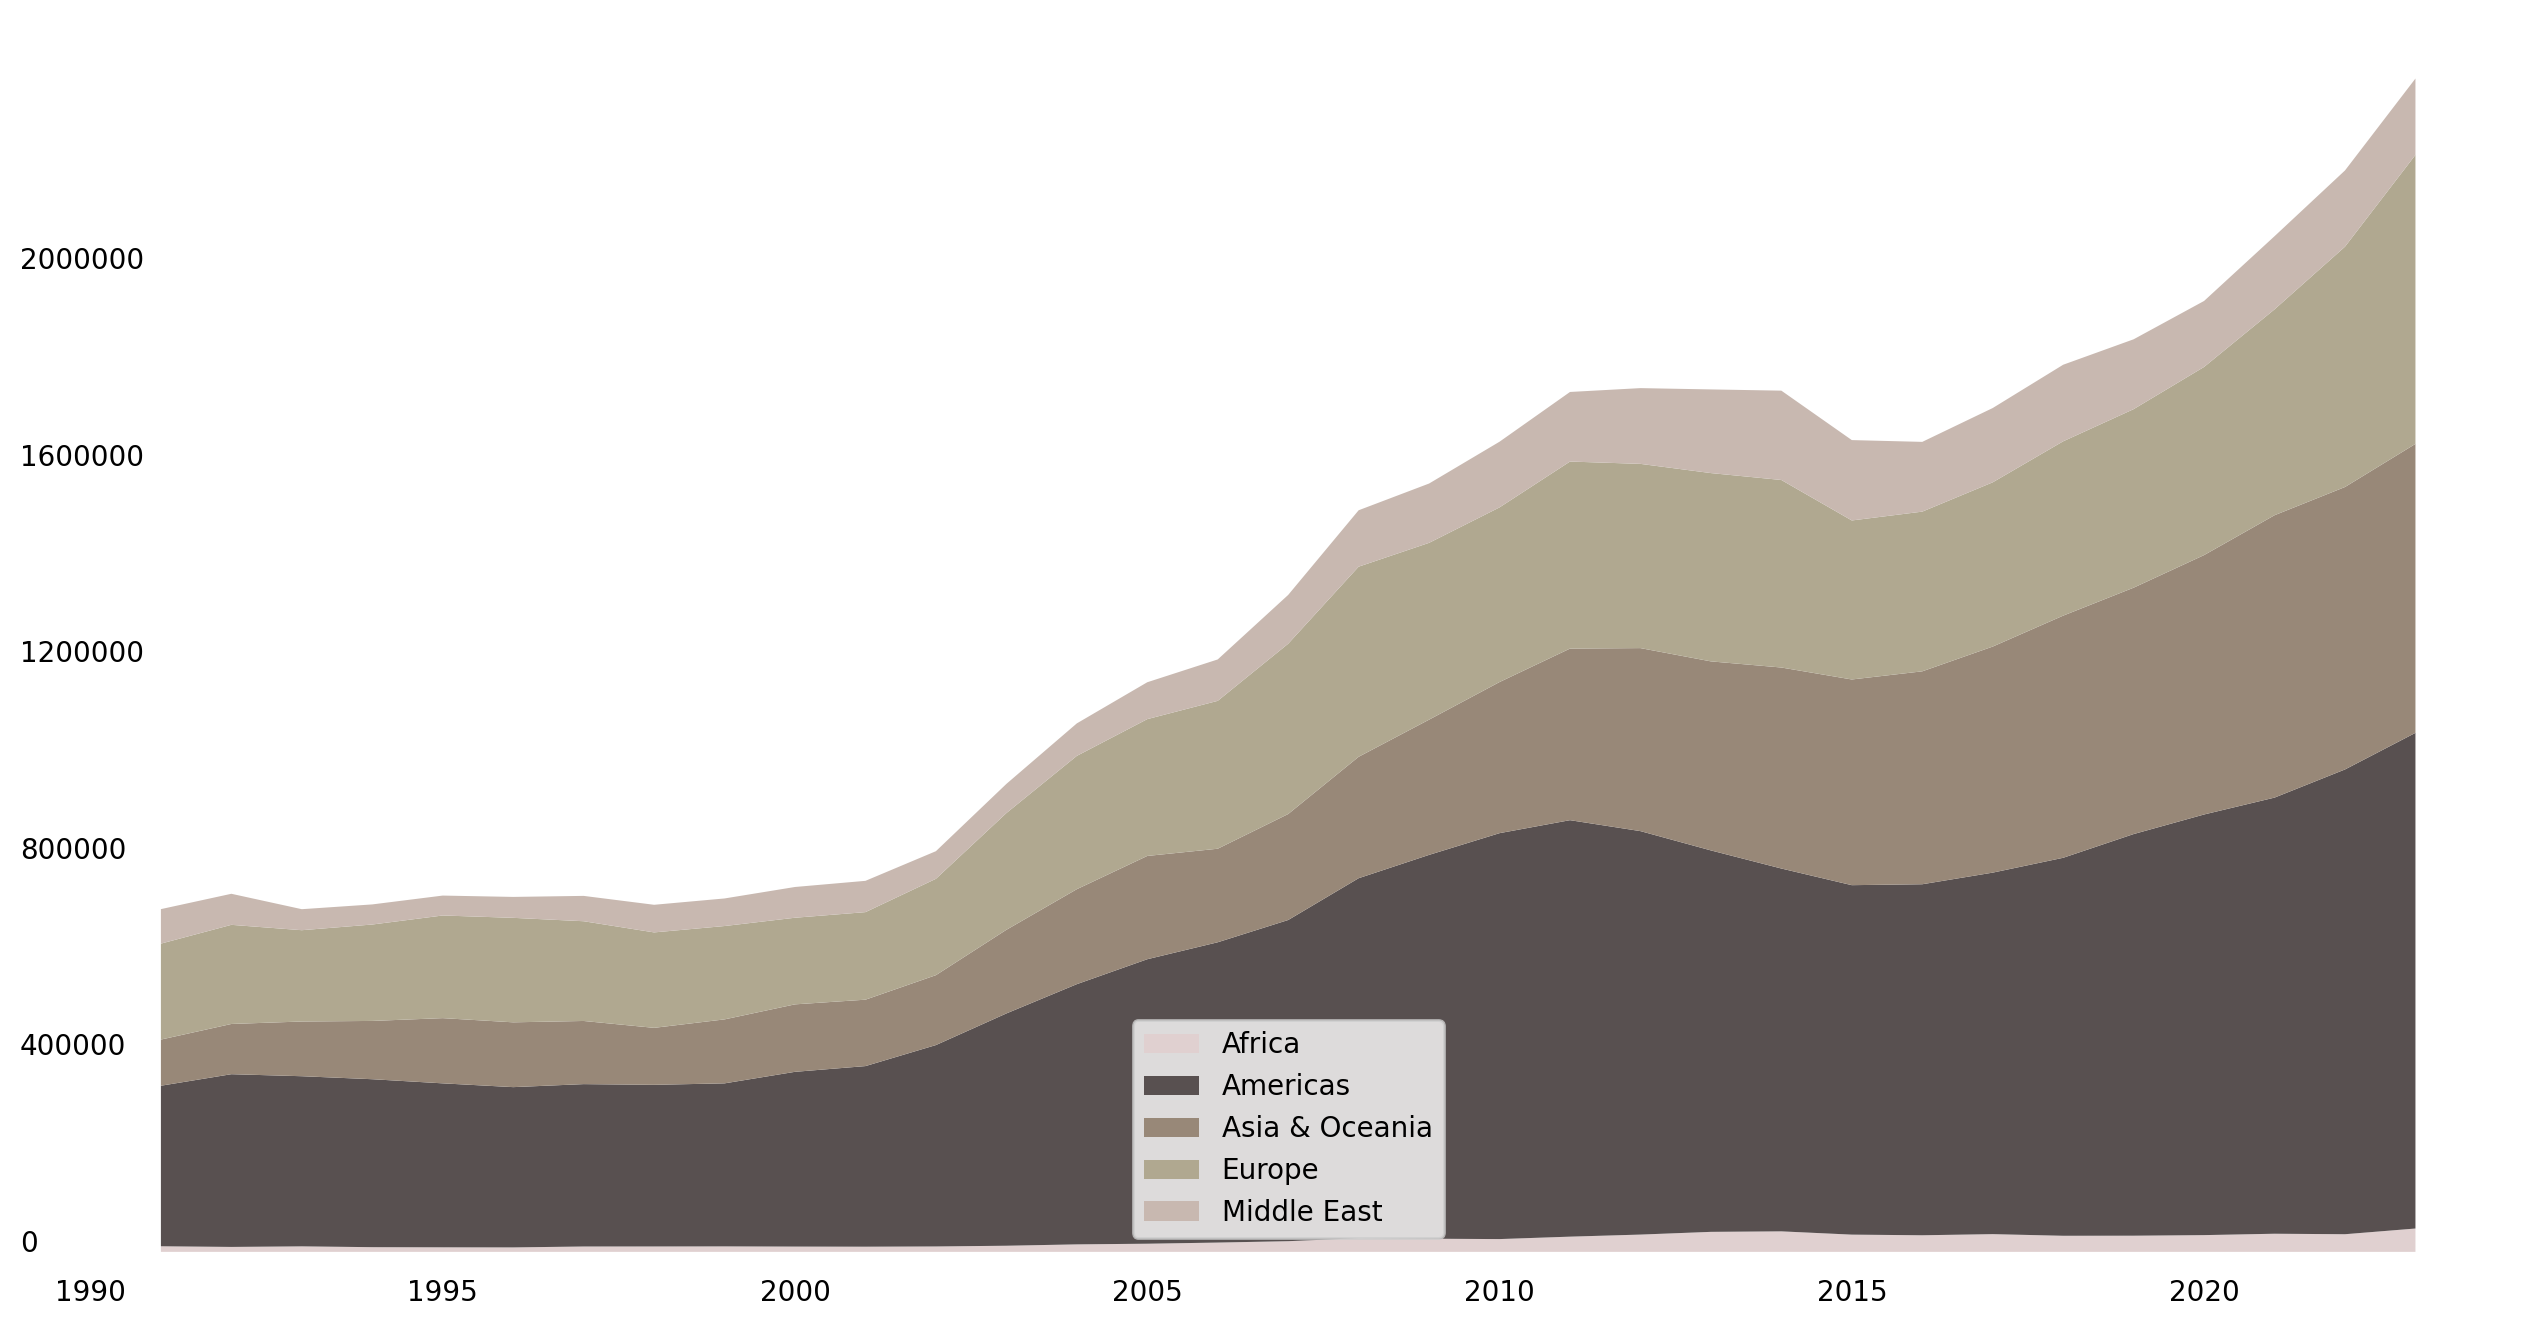

In [3]:
colors = load_cmap("nincada").colors

fig, ax = plt.subplots(dpi=200, figsize=(16,8))

areas = np.stack(df[continents].values, axis=-1)
ax.stackplot(
    df['year'],
    areas,
    #baseline='weighted_wiggle',
    labels=continents,
    colors=colors
)
ax.legend()

ax.set_axis_off()

for value in range(0, 2400000, 400000):
    ax.text(x=1989, y=value, s=value)

for value in range(1990, 2021, 5):
    ax.text(x=value, y=-100000, s=value, ha='center')


plt.show()